importing the necessary llibraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load data
data = pd.read_csv('laptop_prices.csv')

Exploring the data

In [7]:
data.head(5)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [9]:
data.GPU_model.nunique()

110

In [11]:
data.tail(4)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.0,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.0,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.0,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,4,Windows 10,2.20,369.0,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,500,0,HDD,No,Intel,HD Graphics


In [13]:
# Display column names of the dataset
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [15]:
# Display shape of the dtaset
data.shape

(1275, 23)

In [17]:
# Display data types of each columns
data.dtypes

Company                  object
Product                  object
TypeName                 object
Inches                  float64
Ram                       int64
OS                       object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW                   int64
ScreenH                   int64
Touchscreen              object
IPSpanel                 object
RetinaDisplay            object
CPU_company              object
CPU_freq                float64
CPU_model                object
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType       object
SecondaryStorageType     object
GPU_company              object
GPU_model                object
dtype: object

In [19]:
# Check for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [21]:
# display summary of numerical columns
data.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


Data Preprocessing

In [23]:
# Checking for null values
data.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [25]:
# Check for the duplicate values
data.duplicated().sum()

0

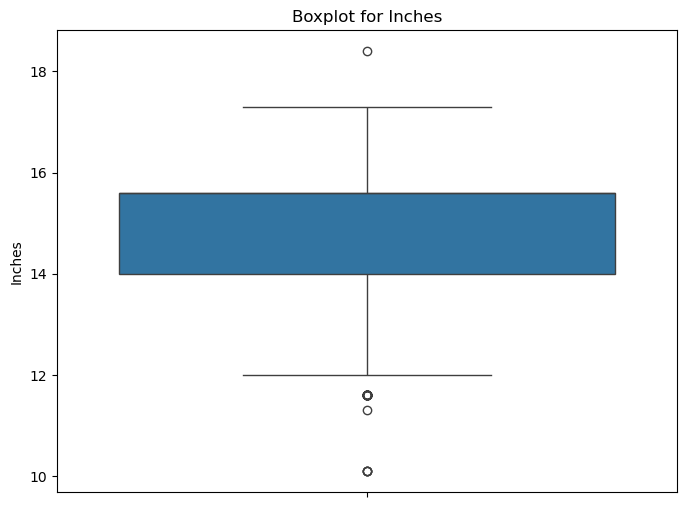

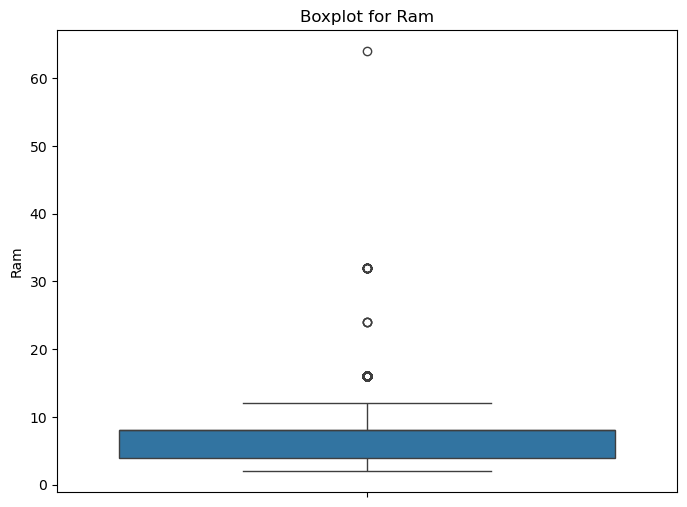

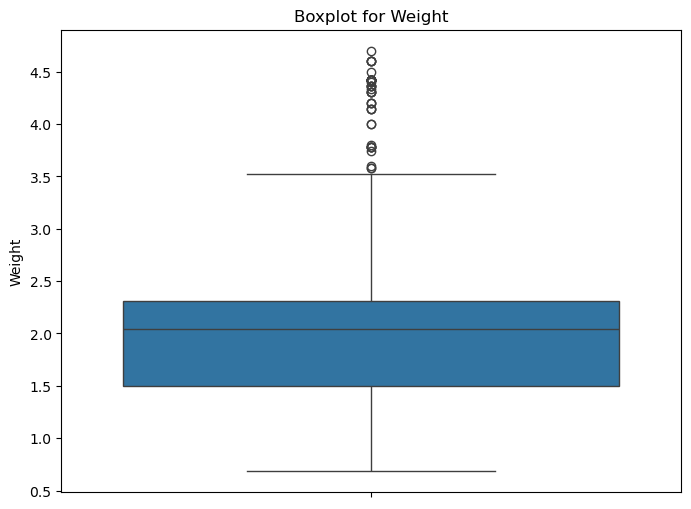

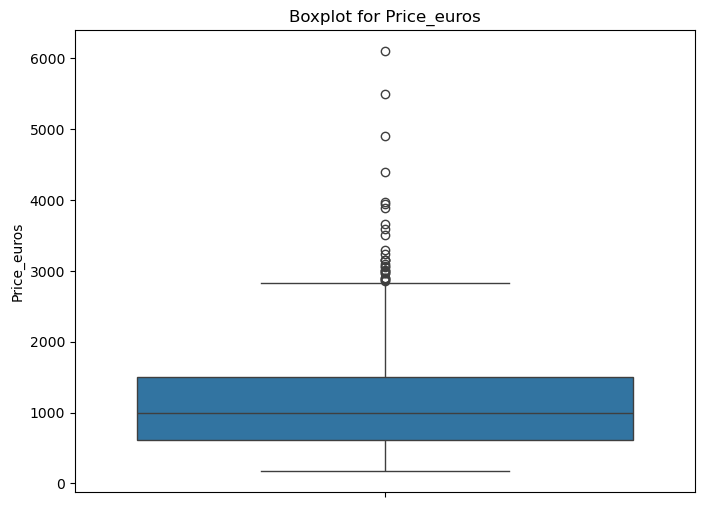

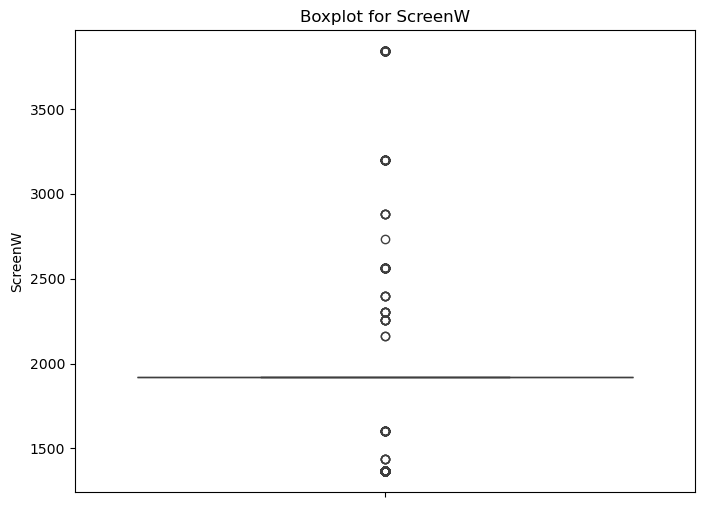

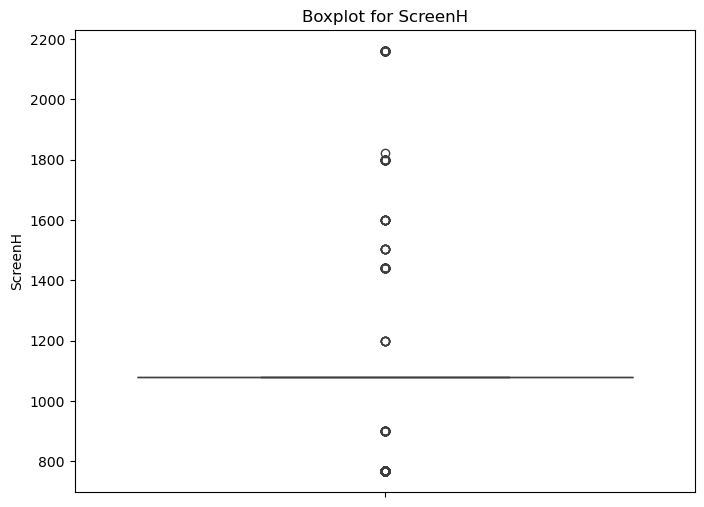

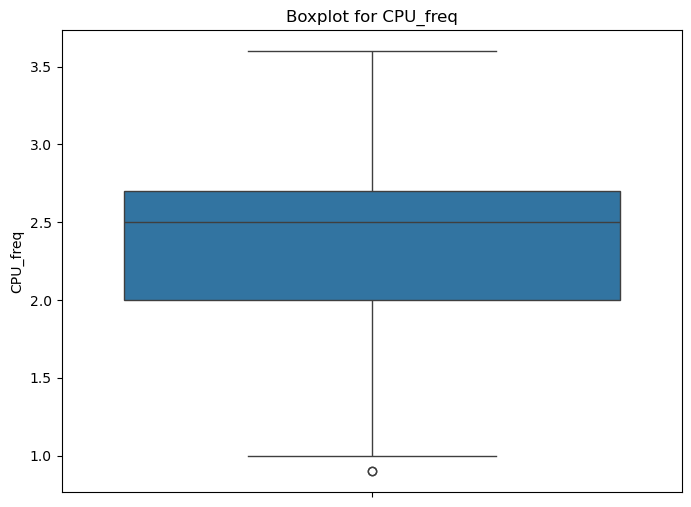

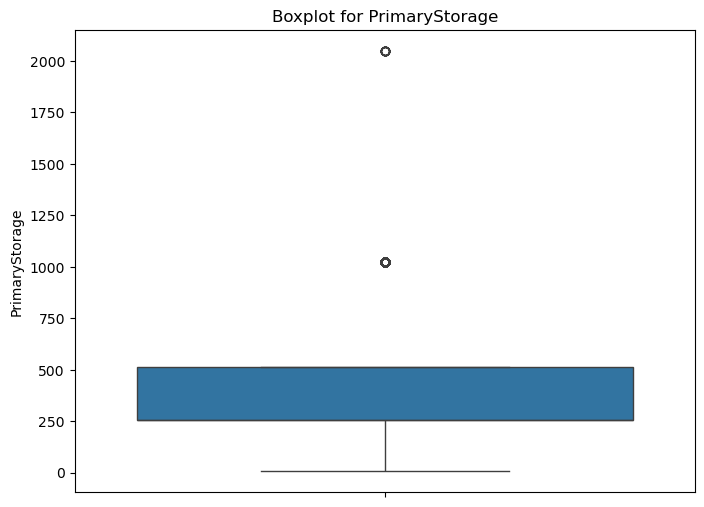

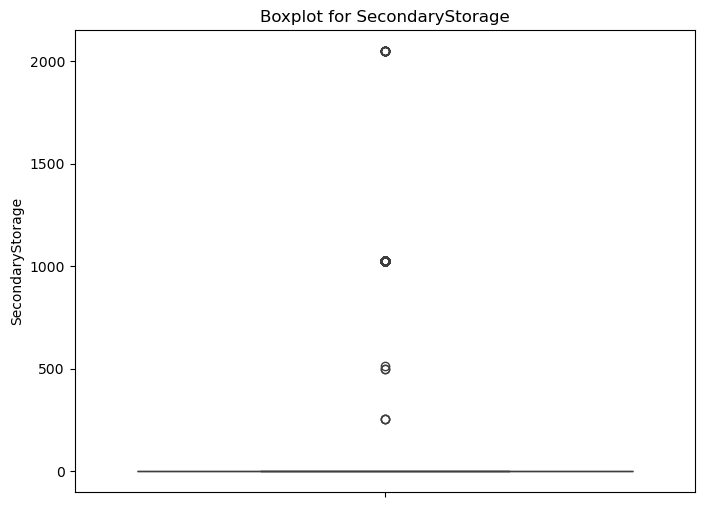

In [27]:
# Check for the outliers
# Boxplot to visualize outliers
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

# Handling outliers using IQR (for numerical columns)
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
data_no_outliers = data[~((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [29]:
# Standardize categorical values
data['OS'] = data['OS'].str.strip().str.lower()

# Check for unique values after standardization
print("\nUnique values in OS column after cleaning:")
print(data['OS'].value_counts())



Unique values in OS column after cleaning:
OS
windows 10      1048
no os             66
linux             58
windows 7         45
chrome os         27
macos             13
mac os x           8
windows 10 s       8
android            2
Name: count, dtype: int64


In [31]:
categorical_columns = data.select_dtypes(include=['object']).columns

# Loop through each categorical column and standardize the values
for col in categorical_columns:
    # Remove leading/trailing spaces and convert to lowercase
    data[col] = data[col].str.strip().str.lower()

# Print out the unique values in each standardized categorical column
for col in categorical_columns:
    print(f"Unique values in {col} column after standardization:")
    print(data[col].value_counts())


Unique values in Company column after standardization:
Company
dell         291
lenovo       289
hp           268
asus         152
acer         101
msi           54
toshiba       48
apple         21
samsung        9
razer          7
mediacom       7
microsoft      6
xiaomi         4
vero           4
chuwi          3
google         3
fujitsu        3
lg             3
huawei         2
Name: count, dtype: int64
Unique values in Product column after standardization:
Product
xps 13                                 30
inspiron 3567                          25
probook 450                            22
250 g6                                 21
legion y520-15ikbn                     19
                                       ..
ideapad 520-15ikbr                      1
thinkpad x260                           1
rog g752vl-uh71t                        1
portege x30-d-10l                       1
x553sa-xx031t (n3050/4gb/500gb/w10)     1
Name: count, Length: 576, dtype: int64
Unique values in TypeNam

Featurre Engineering

In [33]:
from sklearn.preprocessing import LabelEncoder

In [35]:
# 1. Define feature groups for different encoding methods
binary_columns = ['Touchscreen', 'IPSpanel', 'RetinaDisplay']
one_hot_columns = ['Company', 'TypeName', 'OS','CPU_company', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company']
ordinal_column = 'Screen'
label_encode_columns = ['Product', 'CPU_model', 'GPU_model']

In [37]:
# 2. Ordinal Mapping for 'Screen'
ordinal_mapping = {
    'standard': 1,
    'full hd': 2,
    'quad hd+': 3,
    '4k ultra hd': 4
}

In [39]:
# 3. Perform Binary Encoding for binary columns
for col in binary_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

In [41]:
# 4. Perform One-Hot Encoding for one-hot columns
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)

In [43]:
# 5. Perform Ordinal Encoding for 'Screen'
data[ordinal_column] = data[ordinal_column].map(ordinal_mapping)

In [45]:
# 6. Perform Label Encoding for high-cardinality features
label_encoder = LabelEncoder()
for col in label_encode_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [47]:
# 7. Check the result
print("Encoded Data:")
data.head()

Encoded Data:


,Product,Inches,Ram,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,...,CPU_company_samsung,PrimaryStorageType_hdd,PrimaryStorageType_hybrid,PrimaryStorageType_ssd,SecondaryStorageType_hybrid,SecondaryStorageType_no,SecondaryStorageType_ssd,GPU_company_arm,GPU_company_intel,GPU_company_nvidia
0,289,13.3,8,1.37,1339.69,1,2560,1600,NaN,NaN,...,False,False,False,True,False,True,False,False,True,False
1,288,13.3,8,1.34,898.94,1,1440,900,NaN,NaN,...,False,False,False,False,False,True,False,False,True,False
2,50,15.6,8,1.86,575.00,2,1920,1080,NaN,NaN,...,False,False,False,True,False,True,False,False,True,False
3,289,15.4,16,1.83,2537.45,1,2880,1800,NaN,NaN,...,False,False,False,True,False,True,False,False,False,False
4,289,13.3,8,1.37,1803.60,1,2560,1600,NaN,NaN,...,False,False,False,True,False,True,False,False,True,False


In [49]:
z=data.columns
for col in z:
    print(f"Unique values in {col} column :  ")
    print(data[col].value_counts())

Unique values in Product column :  
Product
539    30
229    25
350    22
50     21
281    19
       ..
217     1
454     1
365     1
323     1
531     1
Name: count, Length: 576, dtype: int64
Unique values in Inches column :  
Inches
15.6    647
14.0    193
17.3    164
13.3    160
12.5     39
11.6     31
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64
Unique values in Ram column :  
Ram
8     613
4     367
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: count, dtype: int64
Unique values in Weight column :  
Weight
2.20    120
2.10     58
2.00     45
2.40     42
2.50     38
       ... 
4.50      1
1.14      1
3.80      1
3.25      1
2.34      1
Name: count, Length: 171, dtype: int64
Unique values in Price_euros column :  
Price_euros
1099.0    14
1799.0    14
1499.0    12
1199.0    11
1299.0    11
          ..
2090.0     1
304.0      1
75

In [51]:
# Identify columns with True/False values
boolean_columns = data.select_dtypes(include=['bool']).columns

# Convert True/False to 1/0
for col in boolean_columns:
    data[col] = data[col].astype(int)


In [53]:
# List of columns containing Series-like objects
series_columns = ['Touchscreen', 'IPSpanel', 'RetinaDisplay']  # Replace with your column names

# Convert each Series-like column to its numerical representation
for col in series_columns:
    data[col] = data[col].apply(lambda x: x[0] if isinstance(x, (list, pd.Series)) else x)

# Check the results
print(data[series_columns].head())


   Touchscreen  IPSpanel  RetinaDisplay
0          NaN       NaN            NaN
1          NaN       NaN            NaN
2          NaN       NaN            NaN
3          NaN       NaN            NaN
4          NaN       NaN            NaN


In [55]:
data.fillna(0, inplace=True)

In [57]:
# Calculate skewness for all numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
skewness = data[numerical_features].skew()

# Display skewness
print("Skewness of numerical features:")
print(skewness)

# Identify highly skewed features (e.g., skewness > 1 or < -1)
highly_skewed_features = skewness[abs(skewness) > 1]
print("\nHighly skewed features:")
print(highly_skewed_features)


Skewness of numerical features:
Inches             -0.438622
Ram                 2.698716
Weight              1.150804
Price_euros         1.511147
Screen              0.982464
ScreenW             2.210137
ScreenH             2.117949
Touchscreen         0.000000
IPSpanel            0.000000
RetinaDisplay       0.000000
CPU_freq           -0.838246
PrimaryStorage      1.592866
SecondaryStorage    2.257643
dtype: float64

Highly skewed features:
Ram                 2.698716
Weight              1.150804
Price_euros         1.511147
ScreenW             2.210137
ScreenH             2.117949
PrimaryStorage      1.592866
SecondaryStorage    2.257643
dtype: float64


In [59]:
# Features with high skewness
highly_skewed_features = ['Ram', 'Price_euros', 'ScreenW', 'ScreenH', 'PrimaryStorage', 'SecondaryStorage']

# Apply log transformation to reduce skewness (only for positive values)
for feature in highly_skewed_features:
    if (data[feature] > 0).all():  # Log transformation requires positive values
        data[feature] = np.log1p(data[feature])  # log1p is log(1 + x) to handle 0 safely

# Check skewness again after transformation
new_skewness = data[highly_skewed_features].skew()
print("Skewness after log transformation:")
print(new_skewness)


Skewness after log transformation:
Ram                 0.451535
Price_euros        -0.175626
ScreenW             1.007017
ScreenH             0.994759
PrimaryStorage     -0.592654
SecondaryStorage    2.257643
dtype: float64


In [61]:
from scipy.stats import boxcox

# Apply square root transformation to moderately skewed features
moderate_skewed_features = ['ScreenW', 'ScreenH']
for feature in moderate_skewed_features:
    data[feature] = np.sqrt(data[feature])

# Apply Box-Cox transformation to highly skewed feature (requires positive values)
# Box-Cox only works for strictly positive values, so ensure no zeros are present
if (data['SecondaryStorage'] > 0).all():
    data['SecondaryStorage'], _ = boxcox(data['SecondaryStorage'])

# Check skewness again after further transformation
final_skewness = data[highly_skewed_features].skew()
print("Final skewness after additional transformations:")
print(final_skewness)


Final skewness after additional transformations:
Ram                 0.451535
Price_euros        -0.175626
ScreenW             0.931360
ScreenH             0.917367
PrimaryStorage     -0.592654
SecondaryStorage    2.257643
dtype: float64


In [63]:
# Handle zeros in SecondaryStorage by adding a small constant
data['SecondaryStorage'] = data['SecondaryStorage'].apply(lambda x: x + 1 if x == 0 else x)
data['SecondaryStorage'] = np.log1p(data['SecondaryStorage'])

# Check skewness again
final_skewness = data[['SecondaryStorage']].skew()
print("Skewness of SecondaryStorage after log transformation:")
print(final_skewness)


Skewness of SecondaryStorage after log transformation:
SecondaryStorage    1.833758
dtype: float64


In [65]:
from sklearn.preprocessing import StandardScaler

# Select numerical features that need to be standardized
numerical_columns = ['Weight','Product','Inches','Ram','Price_euros','Screen','CPU_model','GPU_model', 'CPU_freq', 'ScreenW', 'ScreenH', 'PrimaryStorage', 'SecondaryStorage']  # Replace with actual numerical columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the selected features
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Check the result
print(data[numerical_columns].head())


     Weight   Product    Inches       Ram  Price_euros    Screen  CPU_model  \
0 -1.002380 -0.021034 -1.205746  0.138005     0.562530 -1.255105  -0.779839   
1 -1.047227 -0.027331 -1.205746  0.138005    -0.081775 -1.255105  -0.779839   
2 -0.269871 -1.526017  0.403873  0.138005    -0.803032  0.313776  -0.399926   
3 -0.314718 -0.021034  0.263906  1.539590     1.594371 -1.255105   0.106624   
4 -1.002380 -0.021034 -1.205746  0.138005     1.042842 -1.255105  -0.779839   

   GPU_model  CPU_freq   ScreenW   ScreenH  PrimaryStorage  SecondaryStorage  
0   0.340992 -0.005918  1.455606  1.864313       -1.045294         -0.441055  
1   0.113108 -0.998674 -1.127077 -0.650093       -1.045294         -0.441055  
2   0.189069  0.391185  0.176448  0.157653       -0.253157         -0.441055  
3   1.100606  0.788288  1.972590  2.366941        0.541206         -0.441055  
4   0.378973  1.582493  1.455606  1.864313       -0.253157         -0.441055  


In [67]:
# Check the mean and std deviation of the standardized columns
print(data[numerical_columns].mean())  # Should be close to 0
print(data[numerical_columns].std())   # Should be close to 1


Weight             -1.504679e-16
Product             1.546475e-16
Inches              1.426658e-15
Ram                 1.003119e-16
Price_euros         2.039676e-15
Screen             -4.736952e-17
CPU_model           2.061967e-16
GPU_model          -6.687461e-17
CPU_freq           -6.687461e-17
ScreenW             1.044637e-14
ScreenH             1.833200e-14
PrimaryStorage      7.739343e-16
SecondaryStorage    1.839052e-16
dtype: float64
Weight              1.000392
Product             1.000392
Inches              1.000392
Ram                 1.000392
Price_euros         1.000392
Screen              1.000392
CPU_model           1.000392
GPU_model           1.000392
CPU_freq            1.000392
ScreenW             1.000392
ScreenH             1.000392
PrimaryStorage      1.000392
SecondaryStorage    1.000392
dtype: float64


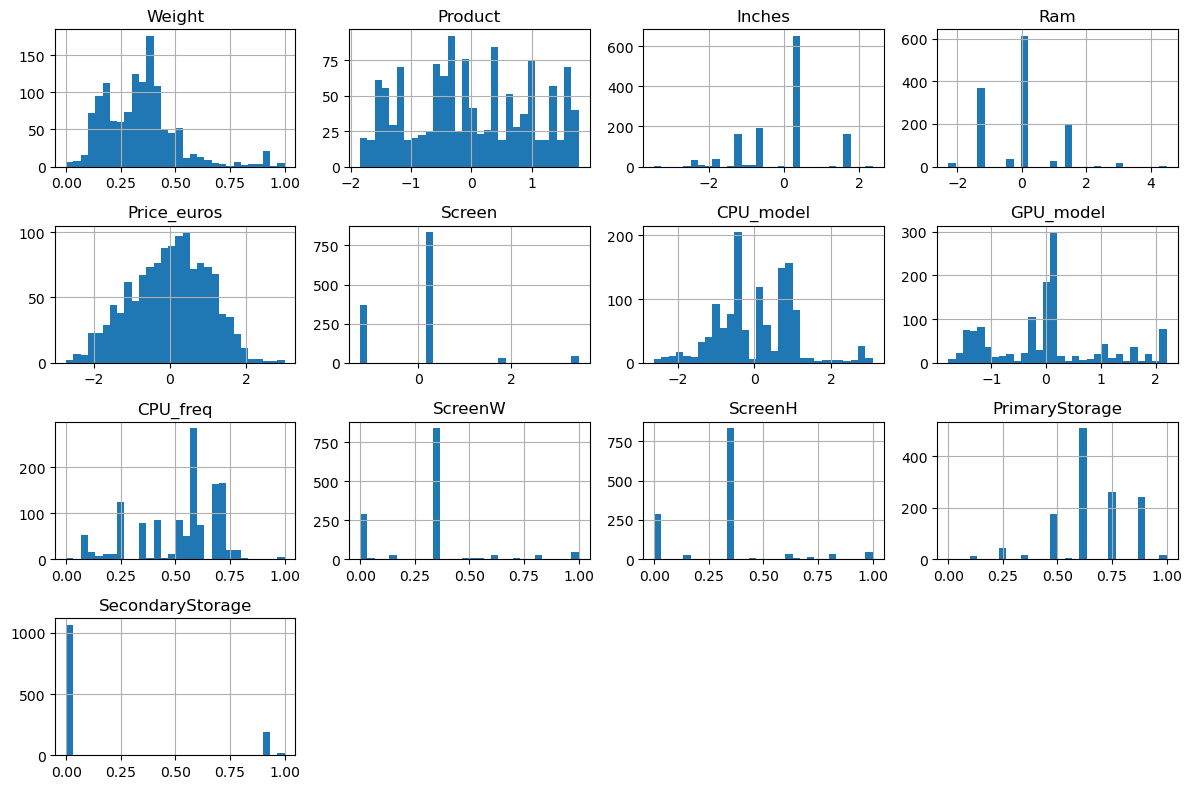

In [73]:
# Double check the data
# Plot histograms of the standardized features
numerical_columns = ['Weight','Product','Inches','Ram','Price_euros','Screen','CPU_model','GPU_model', 'CPU_freq', 'ScreenW', 'ScreenH', 'PrimaryStorage', 'SecondaryStorage']  # Replace with actual numerical columns
data[numerical_columns].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [75]:
w=data.columns
for col in w:
    print(f"Unique values in {col} column :  ")
    print(data[col].value_counts())

Unique values in Product column :  
Product
 1.553215    30
-0.398854    25
 0.363082    22
-1.526017    21
-0.071410    19
             ..
-0.474418     1
 1.017970     1
 0.457537     1
 0.193064     1
 1.502839     1
Name: count, Length: 576, dtype: int64
Unique values in Inches column :  
Inches
 0.403873    647
-0.715862    193
 1.593592    164
-1.205746    160
-1.765614     39
-2.395465     31
-2.115531      6
-1.065779      6
-0.785846      6
-1.905581      5
-3.445217      4
 0.263906      4
-0.016028      4
-1.415697      2
 2.363410      1
 1.383642      1
-0.645879      1
-2.605415      1
Name: count, dtype: int64
Unique values in Ram column :  
Ram
 0.138005    613
-1.157353    367
 1.539590    198
-0.415839     35
 0.948393     25
 3.001351     17
-2.283105     16
 2.389509      3
 4.495255      1
Name: count, dtype: int64
Unique values in Weight column :  
Weight
0.376559    120
0.351621     58
0.326683     45
0.426434     42
0.451372     38
           ... 
0.950125      

In [77]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the selected features
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Check the result
print(data[numerical_columns].head())


     Weight   Product    Inches       Ram  Price_euros    Screen  CPU_model  \
0  0.169576  0.502609  0.385542  0.357182     0.573361  0.000000   0.322222   
1  0.162095  0.500870  0.385542  0.357182     0.461116  0.000000   0.322222   
2  0.291771  0.086957  0.662651  0.357182     0.335465  0.333333   0.388889   
3  0.284289  0.502609  0.638554  0.563956     0.753120  0.000000   0.477778   
4  0.169576  0.502609  0.385542  0.357182     0.657037  0.000000   0.322222   

   GPU_model  CPU_freq   ScreenW   ScreenH  PrimaryStorage  SecondaryStorage  
0   0.533333  0.518519  0.615566  0.717033        0.490539               0.0  
1   0.476190  0.333333  0.052697  0.158126        0.490539               0.0  
2   0.495238  0.592593  0.336787  0.337674        0.617525               0.0  
3   0.723810  0.666667  0.728237  0.828758        0.744867               0.0  
4   0.542857  0.814815  0.615566  0.717033        0.617525               0.0  


In [80]:
data.columns

Index(['Product', 'Inches', 'Ram', 'Weight', 'Price_euros', 'Screen',
       'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay',
       'CPU_freq', 'CPU_model', 'PrimaryStorage', 'SecondaryStorage',
       'GPU_model', 'Company_apple', 'Company_asus', 'Company_chuwi',
       'Company_dell', 'Company_fujitsu', 'Company_google', 'Company_hp',
       'Company_huawei', 'Company_lenovo', 'Company_lg', 'Company_mediacom',
       'Company_microsoft', 'Company_msi', 'Company_razer', 'Company_samsung',
       'Company_toshiba', 'Company_vero', 'Company_xiaomi', 'TypeName_gaming',
       'TypeName_netbook', 'TypeName_notebook', 'TypeName_ultrabook',
       'TypeName_workstation', 'OS_chrome os', 'OS_linux', 'OS_mac os x',
       'OS_macos', 'OS_no os', 'OS_windows 10', 'OS_windows 10 s',
       'OS_windows 7', 'CPU_company_intel', 'CPU_company_samsung',
       'PrimaryStorageType_hdd', 'PrimaryStorageType_hybrid',
       'PrimaryStorageType_ssd', 'SecondaryStorageType_hybrid',
    

In [82]:
import pandas as pd

# Compute the correlation matrix
corr_matrix = data.corr()

# Set the threshold for correlation (e.g., 0.9)
threshold = 0.9

# Find the pairs of features with correlation greater than the threshold
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]  # Get the column name
            high_corr_features.add(colname)

# Drop highly correlated features
data.drop(columns=high_corr_features, inplace=True)

# Check the result
print("Remaining columns after removing highly correlated features:")
print(data.columns)



Remaining columns after removing highly correlated features:
Index(['Product', 'Inches', 'Ram', 'Weight', 'Price_euros', 'Screen',
       'ScreenW', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_freq',
       'CPU_model', 'PrimaryStorage', 'SecondaryStorage', 'GPU_model',
       'Company_apple', 'Company_asus', 'Company_chuwi', 'Company_dell',
       'Company_fujitsu', 'Company_google', 'Company_hp', 'Company_huawei',
       'Company_lenovo', 'Company_lg', 'Company_mediacom', 'Company_microsoft',
       'Company_msi', 'Company_razer', 'Company_samsung', 'Company_toshiba',
       'Company_vero', 'Company_xiaomi', 'TypeName_gaming', 'TypeName_netbook',
       'TypeName_notebook', 'TypeName_ultrabook', 'TypeName_workstation',
       'OS_chrome os', 'OS_linux', 'OS_mac os x', 'OS_macos', 'OS_no os',
       'OS_windows 10', 'OS_windows 10 s', 'OS_windows 7', 'CPU_company_intel',
       'CPU_company_samsung', 'PrimaryStorageType_hdd',
       'PrimaryStorageType_hybrid', 'PrimaryStorageTyp

In [84]:
# Remove constant features (features where all values are the same)
data = data.loc[:, data.nunique() > 1]

# Remove duplicate columns
data = data.loc[:, ~data.columns.duplicated()]

# Check the result
print("Remaining columns after removing constant and duplicate features:")
print(data.columns)


Remaining columns after removing constant and duplicate features:
Index(['Product', 'Inches', 'Ram', 'Weight', 'Price_euros', 'Screen',
       'ScreenW', 'CPU_freq', 'CPU_model', 'PrimaryStorage',
       'SecondaryStorage', 'GPU_model', 'Company_apple', 'Company_asus',
       'Company_chuwi', 'Company_dell', 'Company_fujitsu', 'Company_google',
       'Company_hp', 'Company_huawei', 'Company_lenovo', 'Company_lg',
       'Company_mediacom', 'Company_microsoft', 'Company_msi', 'Company_razer',
       'Company_samsung', 'Company_toshiba', 'Company_vero', 'Company_xiaomi',
       'TypeName_gaming', 'TypeName_netbook', 'TypeName_notebook',
       'TypeName_ultrabook', 'TypeName_workstation', 'OS_chrome os',
       'OS_linux', 'OS_mac os x', 'OS_macos', 'OS_no os', 'OS_windows 10',
       'OS_windows 10 s', 'OS_windows 7', 'CPU_company_intel',
       'CPU_company_samsung', 'PrimaryStorageType_hdd',
       'PrimaryStorageType_hybrid', 'PrimaryStorageType_ssd',
       'SecondaryStorageType_hy

In [88]:
# Example: Drop the first category for each one-hot encoded feature
company_columns = ['Company_apple', 'Company_asus', 'Company_chuwi', 'Company_dell', 'Company_fujitsu', 'Company_google', 'Company_hp', 'Company_huawei', 'Company_lenovo', 'Company_lg', 'Company_mediacom', 'Company_microsoft', 'Company_msi', 'Company_razer', 'Company_samsung', 'Company_toshiba', 'Company_vero', 'Company_xiaomi']
type_columns = ['TypeName_gaming', 'TypeName_netbook', 'TypeName_notebook', 'TypeName_ultrabook', 'TypeName_workstation']
os_columns = ['OS_chrome os', 'OS_linux', 'OS_mac os x', 'OS_macos', 'OS_no os', 'OS_windows 10', 'OS_windows 10 s', 'OS_windows 7']
cpu_company_columns = ['CPU_company_intel', 'CPU_company_samsung']
primary_storage_type_columns = ['PrimaryStorageType_hdd', 'PrimaryStorageType_hybrid', 'PrimaryStorageType_ssd']
secondary_storage_type_columns = ['SecondaryStorageType_hybrid',  'SecondaryStorageType_ssd']
gpu_company_columns = ['GPU_company_arm', 'GPU_company_intel', 'GPU_company_nvidia']

# Remove one column from each set of dummy variables (one-hot encoding)
columns_to_remove = company_columns[1:] + type_columns[1:] + os_columns[1:] + cpu_company_columns[1:] + primary_storage_type_columns[1:] + secondary_storage_type_columns[1:] + gpu_company_columns[1:]

# Drop the selected columns
data.drop(columns=columns_to_remove, inplace=True)

# Check the result
print("Remaining columns after removing one-hot encoded duplicates:")
print(data.columns)


Remaining columns after removing one-hot encoded duplicates:
Index(['Product', 'Inches', 'Ram', 'Weight', 'Price_euros', 'Screen',
       'ScreenW', 'CPU_freq', 'CPU_model', 'PrimaryStorage',
       'SecondaryStorage', 'GPU_model', 'Company_apple', 'TypeName_gaming',
       'OS_chrome os', 'CPU_company_intel', 'PrimaryStorageType_hdd',
       'SecondaryStorageType_hybrid'],
      dtype='object')


In [90]:
data.head()

,Product,Inches,Ram,Weight,Price_euros,Screen,ScreenW,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,GPU_model,Company_apple,TypeName_gaming,OS_chrome os,CPU_company_intel,PrimaryStorageType_hdd,SecondaryStorageType_hybrid
0,0.502609,0.385542,0.357182,0.169576,0.573361,0.000000,0.615566,0.518519,0.322222,0.490539,0.0,0.533333,1,0,0,1,0,0
1,0.500870,0.385542,0.357182,0.162095,0.461116,0.000000,0.052697,0.333333,0.322222,0.490539,0.0,0.476190,1,0,0,1,0,0
2,0.086957,0.662651,0.357182,0.291771,0.335465,0.333333,0.336787,0.592593,0.388889,0.617525,0.0,0.495238,0,0,0,1,0,0
3,0.502609,0.638554,0.563956,0.284289,0.753120,0.000000,0.728237,0.666667,0.477778,0.744867,0.0,0.723810,1,0,0,1,0,0
4,0.502609,0.385542,0.357182,0.169576,0.657037,0.000000,0.615566,0.814815,0.322222,0.617525,0.0,0.542857,1,0,0,1,0,0


Feature Selection

In [92]:
# Assuming 'data' is your dataframe and 'Price_euros' is your target variable
X = data.drop(columns=['Price_euros'])  # Features
y = data['Price_euros']  # Target

In [96]:
from sklearn.feature_selection import SelectKBest, f_regression
# Apply SelectKBest with F-regression to select the top k features
selector = SelectKBest(score_func=f_regression, k='all')  # You can set k to a specific number
X_new = selector.fit_transform(X, y)

# Get the scores for each feature
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})

# Sort the features by their scores
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("Top features based on SelectKBest:")
print(feature_scores)

Top features based on SelectKBest:
                        Feature        Score
2                           Ram  1820.464703
5                       ScreenW   725.413804
4                        Screen   462.575215
6                      CPU_freq   426.986428
7                     CPU_model   372.953310
15       PrimaryStorageType_hdd   340.204418
12              TypeName_gaming   193.051888
9              SecondaryStorage   151.636752
14            CPU_company_intel    70.994312
0                       Product    50.279468
13                 OS_chrome os    43.056268
3                        Weight    29.890389
10                    GPU_model    23.488296
11                Company_apple    11.220634
8                PrimaryStorage     8.266934
16  SecondaryStorageType_hybrid     6.933100
1                        Inches     1.923366


In [100]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Use a model, here Linear Regression, as the estimator
model = LinearRegression()

# Initialize RFE(Recursive Feature Elimination) with the model
rfe = RFE(estimator=model, n_features_to_select=5)  # You can set the number of features you want to keep
X_rfe = rfe.fit_transform(X, y)

# Get the ranking of features
rfe_features = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
rfe_features = rfe_features.sort_values(by='Ranking')

print("Top features based on RFE:")
print(rfe_features)


Top features based on RFE:
                        Feature  Ranking
8                PrimaryStorage        1
2                           Ram        1
7                     CPU_model        1
5                       ScreenW        1
6                      CPU_freq        1
15       PrimaryStorageType_hdd        2
14            CPU_company_intel        3
16  SecondaryStorageType_hybrid        4
1                        Inches        5
4                        Screen        6
3                        Weight        7
0                       Product        8
11                Company_apple        9
9              SecondaryStorage       10
10                    GPU_model       11
12              TypeName_gaming       12
13                 OS_chrome os       13


In [102]:
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor()

# Fit the model to the data
rf_model.fit(X, y)

# Get feature importances
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

print("Top features based on Random Forest feature importance:")
print(importances)


Top features based on Random Forest feature importance:
                        Feature  Importance
2                           Ram    0.582475
7                     CPU_model    0.082444
6                      CPU_freq    0.073841
3                        Weight    0.064461
0                       Product    0.064023
10                    GPU_model    0.029315
8                PrimaryStorage    0.026563
1                        Inches    0.025770
5                       ScreenW    0.021602
15       PrimaryStorageType_hdd    0.013574
4                        Screen    0.010349
9              SecondaryStorage    0.001840
12              TypeName_gaming    0.001829
14            CPU_company_intel    0.001253
13                 OS_chrome os    0.000508
11                Company_apple    0.000127
16  SecondaryStorageType_hybrid    0.000027


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [106]:
# Initialize and train the Linear Regression model
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [108]:
# Make Predictions
# After training the model, make predictions on the test set.

# Predicting the price using the test set
y_pred = model.predict(X_test)

In [110]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.005303065442460293
R-squared: 0.8047963300364622


In [116]:
# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.07282214939467452


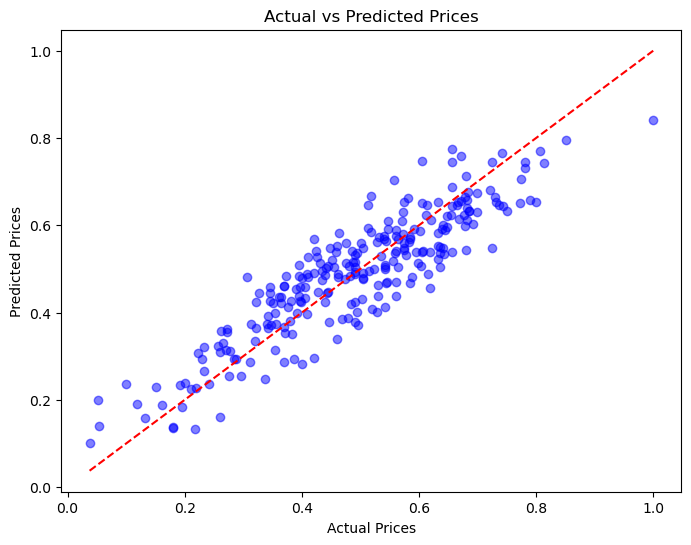

In [118]:
 # Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()